# Machine Learning Pipeline - Model Training

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables

X_train = pd.read_csv(r'C:\Users\kinwa\xtrain.csv')
X_test = pd.read_csv(r'C:\Users\kinwa\xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.714286,0.75,0.461171,0.366365,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.875000,0.375,0.5,0.75,0.571429,0.777778,0.50,0.014706,0.049180,0.2,0.285714,0.857143,0.933333,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.8,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.545455,0.5,0.8,0.0,0.0,0.0
1,0.714286,0.75,0.456066,0.388528,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.416667,0.375,0.5,0.75,0.571429,0.444444,0.75,0.360294,0.049180,0.2,0.285714,0.571429,0.600000,0.666667,0.03375,0.666667,0.5,0.4,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.8,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.636364,0.5,0.8,0.0,0.0,0.0
2,0.928571,0.75,0.394699,0.336782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.958333,0.375,0.5,1.00,0.571429,0.888889,0.50,0.036765,0.098361,0.6,0.285714,0.428571,0.400000,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.090909,0.5,0.8,0.0,0.0,0.0
3,0.714286,0.75,0.445002,0.482280,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.500000,0.375,0.5,0.75,0.571429,0.666667,0.50,0.066176,0.163934,0.2,0.285714,0.857143,0.933333,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.636364,0.5,0.8,1.0,0.0,0.0
4,0.714286,0.75,0.577658,0.391756,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.416667,0.375,0.5,0.75,0.571429,0.555556,0.50,0.323529,0.737705,0.2,0.285714,0.571429,0.666667,0.666667,0.17000,0.333333,0.5,0.4,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,0.5,0.0,0.545455,0.5,0.8,0.0,0.0,0.0


In [3]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv(r'C:\Users\kinwa\ytrain.csv')
y_test = pd.read_csv(r'C:\Users\kinwa\ytest.csv')

y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


In [4]:
# load the pre-selected features

features = pd.read_csv(r'C:\Users\kinwa\selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [5]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

In [6]:
## Regularised linear regression: Lasso

lin_model = Lasso(alpha=0.001, random_state=0)

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [7]:
# evaluate the model:
# ====================

# In order to get the true performance of the Lasso
# let's transform both the target and the predictions
# back to the original house prices values.

# an then let's evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set

pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: ', mean_squared_error(np.exp(y_train), np.exp(pred)))
print('train rmse: ', mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))
print('train r2: ', r2_score(np.exp(y_train), np.exp(pred)))



train mse:  769371041.5987631
train rmse:  27737.53849206456
train r2:  0.8767790265966388


In [8]:
# make predictions for test set

pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: ', mean_squared_error(np.exp(y_test), np.exp(pred)))
print('test rmse: ', mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))
print('test r2: ', r2_score(np.exp(y_test), np.exp(pred)))

test mse:  1114232541.662745
test rmse:  33380.12195398251
test r2:  0.8378617797889223


In [10]:
print('Average house price: ', np.exp(y_train).median())

Average house price:  SalePrice    163000.0
dtype: float64


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

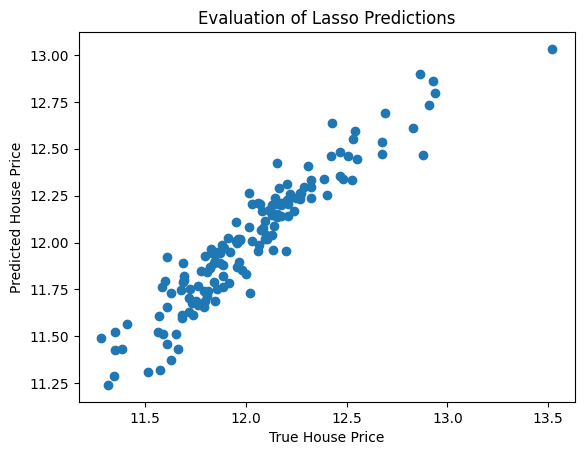

In [11]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [12]:
#### model is doing a pretty good job at predicting house prices

In [13]:
y_test.reset_index(drop=True)

,SalePrice
0,12.209188
1,11.798104
2,11.608236
3,12.165251
4,11.385092
...,...
141,11.884489
142,12.287653
143,11.921718
144,11.598727


In [14]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      12.206172
1      11.926620
2      11.655046
3      12.290107
4      11.432616
         ...    
141    11.765823
142    12.296678
143    11.948215
144    11.797910
145    12.081060
Length: 146, dtype: float64

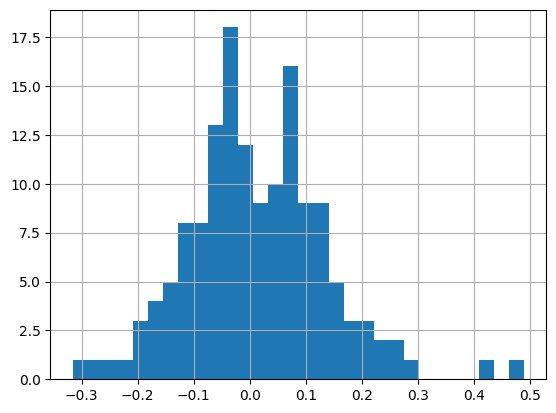

In [15]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

In [16]:
#### The distribution of the errors follows quite closely a gaussian distribution. 
#### That suggests that our model is doing a good job as well.

Text(0.5, 1.0, 'Feature Importance')

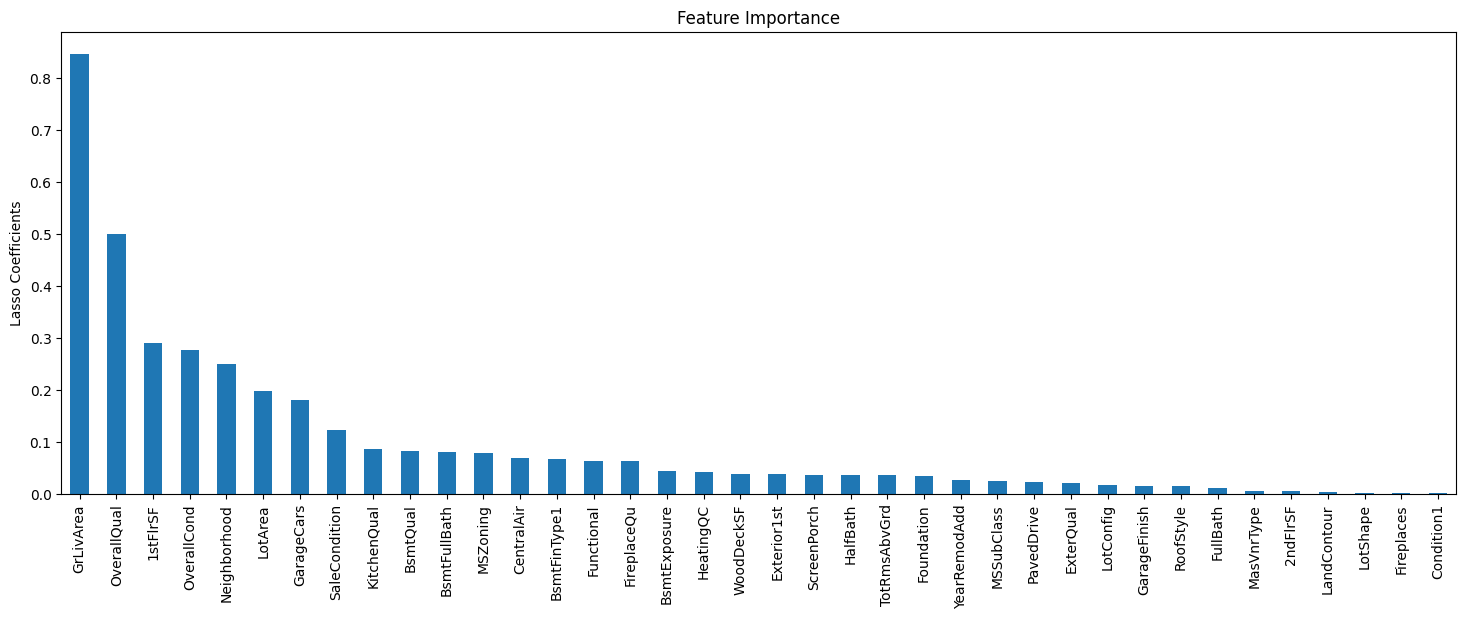

In [17]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [18]:
# we are happy with our model, so we save it to be able
# to score new data

joblib.dump(lin_model, 'linear_regression.joblib')

['linear_regression.joblib']